In [2]:
pip install pandas scikit-learn wordcloud matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 863.8 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd

# Load the dataset
file_path = 'foods_testing.csv'
df = pd.read_csv(file_path, sep=',', quotechar='"', encoding='ISO-8859-1')

# Check the first few rows of the dataset
print(df.head())

   ID   productID          userId profileName helpfulness        time  \
0   0  B001E4KFG0  A3SGXH7AUHU8GW  delmartian         1/1  1303862400   
1  20  B001GVISJM  A1WO0KGLPR5PV6    mom2emma         0/0  1313452800   
2  49  B001EO5QW8  A276999Y6VRSCQ        JMay         0/1  1334016000   
3  50  B001EO5QW8  A108P30XVUFKXY   Roberto A         0/7  1203379200   
4  78  B004X2KR36  A2AB7M9UCNBVN7    sharonh4         0/0  1346976000   

                      summary  \
0       Good Quality Dog Food   
1                Always fresh   
2                  Same stuff   
3               Don't like it   
4  Order only in cold weather   

                                                text  
0  I have bought several of the Vitality canned d...  
1  My husband is a Twizzlers addict.  We've bough...  
2  This is the same stuff you can buy at the big ...  
3  This oatmeal is not good. Its mushy. soft. I d...  
4  The taste was great. but the berries had melte...  


In [42]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Download stopwords and wordnet
nltk.download('stopwords')
nltk.download('wordnet')

# Load the dataset
file_path = 'foods_testing.csv'
df = pd.read_csv(file_path, sep=',', quotechar='"', encoding='ISO-8859-1')

# Text Preprocessing: Clean, remove stop words, and lemmatize
def preprocess_text(text):
    # Remove punctuation and non-alphabet characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()  # Convert to lowercase
    
    # Tokenize and remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join words back into a single string
    return " ".join(words)

# Apply text preprocessing
df['cleaned_text'] = df['text'].apply(preprocess_text)

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(max_features=2000)  # Increased feature count
X = vectorizer.fit_transform(df['cleaned_text'])

# Assuming binary sentiment labels (you should use real sentiment labels)
import numpy as np
df['sentiment'] = np.random.randint(0, 2, size=len(df))  # Random sentiment for illustration
y = df['sentiment']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/suvarnadurghadontamsetty/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/suvarnadurghadontamsetty/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [44]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, 30],        # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required at a leaf node
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV to find best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best hyperparameters from GridSearchCV
best_rf = grid_search.best_estimator_

# Train the model with best hyperparameters
best_rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy after tuning: {accuracy}')
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_sa

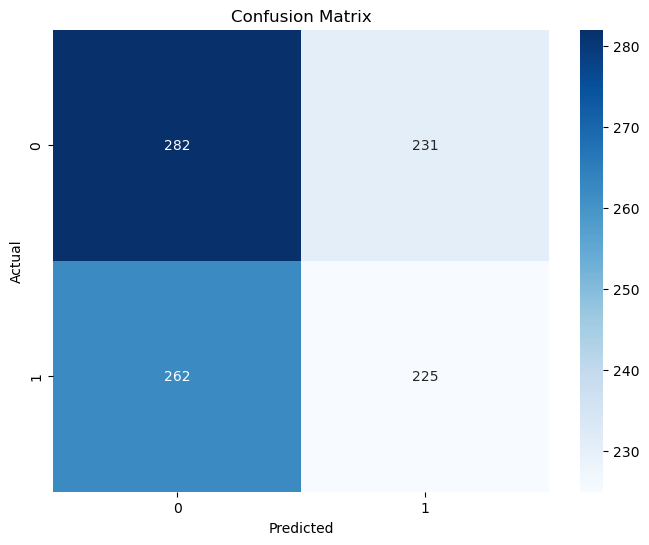

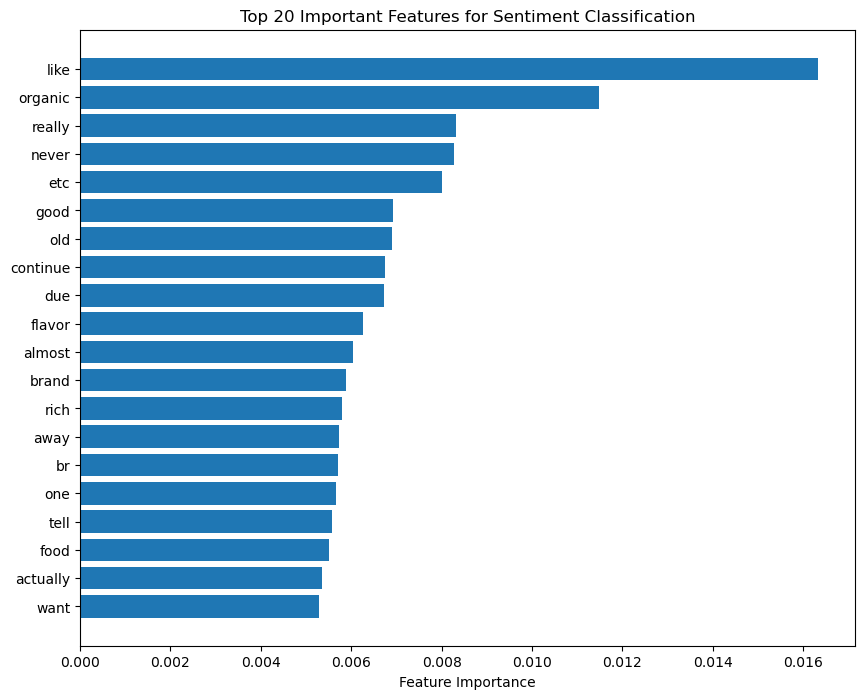

In [48]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Feature Importance
feature_importance = best_rf.feature_importances_
sorted_idx = feature_importance.argsort()

# Plot top 20 important features
plt.figure(figsize=(10, 8))
plt.barh(range(20), feature_importance[sorted_idx][-20:], align='center')
plt.yticks(range(20), [vectorizer.get_feature_names_out()[i] for i in sorted_idx[-20:]])
plt.xlabel('Feature Importance')
plt.title('Top 20 Important Features for Sentiment Classification')
plt.show()